In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

In [5]:
def MyResNet():
  
  inputs = keras.Input(shape = (32,32,3), name = 'img') #name of the layer is img

  x = layers.Conv2D(32, 3, activation = 'relu', kernel_initializer='he_uniform')(inputs)
  x = layers.Conv2D(64, 3, activation = 'relu', kernel_initializer='he_uniform')(x)
  block_1_output = layers.MaxPooling2D(3)(x)

  x = layers.Conv2D(64, 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')( block_1_output)
  x = layers.Conv2D(64, 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(x )
  
  block_2_output = layers.add([x,block_1_output])

  x = layers. Conv2D(64, 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(block_2_output)
  x = layers. Conv2D(64, 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(x)

  block_3_output = layers.add([x,block_2_output])

  x = layers.Conv2D(128, 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(block_3_output)
  x = layers.Conv2D(64, 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(x)

  block_4_output = layers.add([x,block_3_output])

  x = layers.Flatten()(block_4_output)
  x = layers.Dense(256, activation = 'relu', kernel_initializer='he_uniform')(x)
  x = layers.Dropout(0.5)(x)

  x = layers.Dense(128, activation = 'relu', kernel_initializer='he_uniform')(x)
  x = layers.Dropout(0.5)(x)

  x = layers.Dense(64, activation = 'relu', kernel_initializer='he_uniform')(x)
  outputs = layers.Dense(10, activation = 'softmax', kernel_initializer='he_uniform')(x)
  
  model = keras.Model(inputs, outputs, name = 'MyResNet')
  return model
  



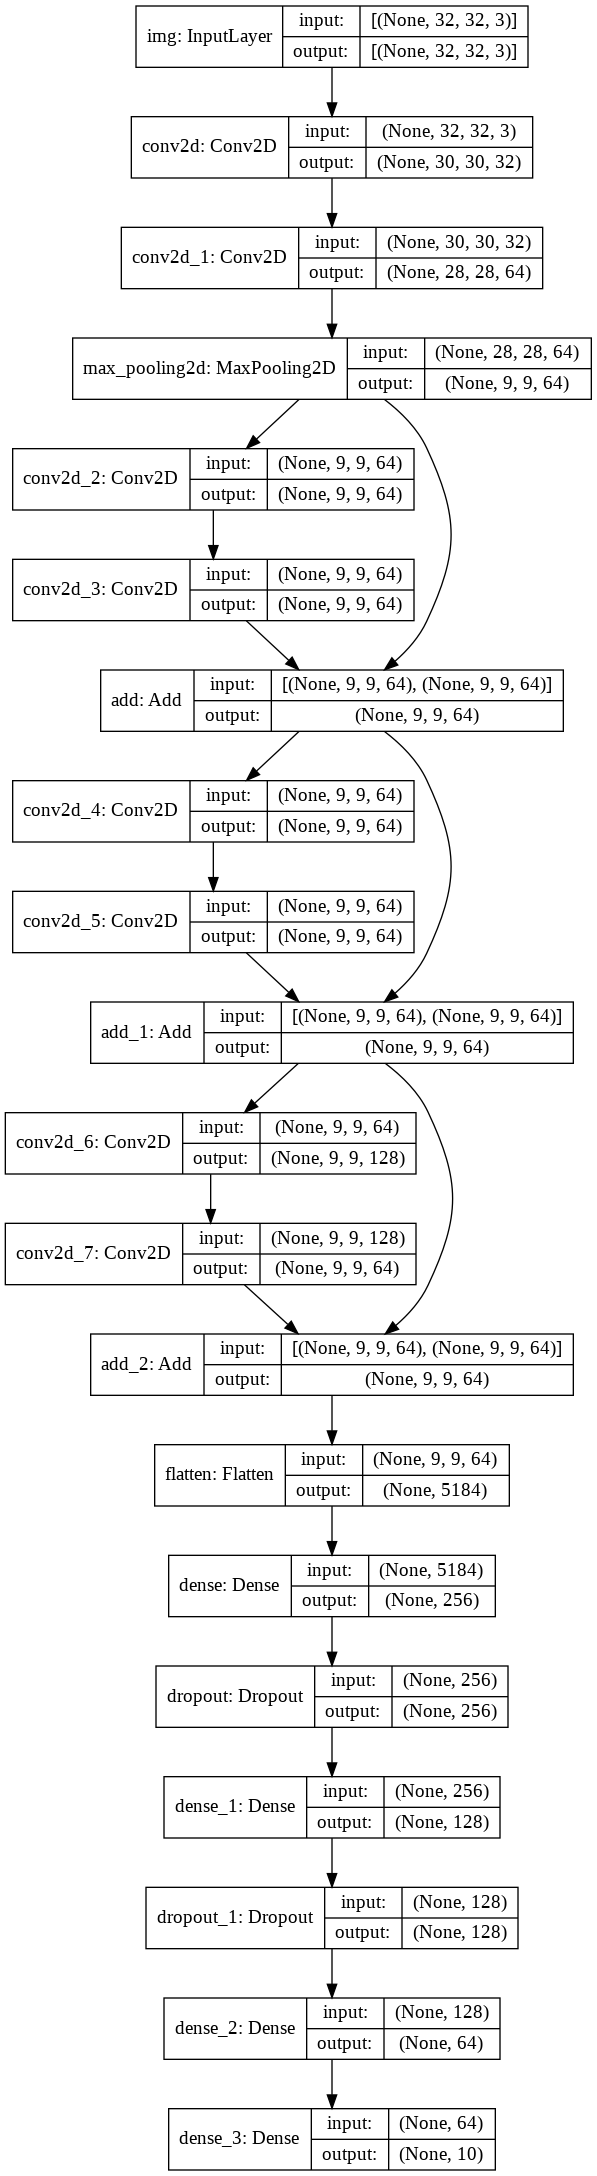

In [6]:
model_t = MyResNet()
keras.utils.plot_model(model_t, 'MyResNet.png', show_shapes = True)

In [7]:
model_t.summary()

Model: "MyResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
___________________________________________________________________________________________

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(y_train)

model_t.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model_t.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          validation_split=0.25)


170500096/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Epoch 1/20
1172/1172 [==============================] - 42s 8ms/step - loss: 2.1935 - acc: 0.2209 - val_loss: 1.3801 - val_acc: 0.4905
Epoch 2/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.4554 - acc: 0.4621 - val_loss: 1.1279 - val_acc: 0.5956
Epoch 3/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.1957 - acc: 0.5736 - val_loss: 0.9949 - val_acc: 0.6555
Epoch 4/20
1172/1172 [==============================] - 8s 7ms/step - loss: 1.0614 - acc: 0.6285 - val_loss: 0.9288 - val_acc: 0.6804
Epoch 5/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.9494 - acc: 0.6709 - val_loss: 0.9039 - val_acc: 0.6884
Epoch 6/20
1172/1172 [==============================] - 8s 7ms/step - loss: 0.8639 - ac

In [9]:
print (4/2.0)

2.0
